In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

### Load data

In [3]:
dataframe = pd.read_csv('US-pumpkins.csv')
dataframe.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


### Know your data

In [4]:
dataframe.shape

(1757, 26)

In [5]:
dataframe.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

### Drop columns

In [6]:
columns = ['Package', 'Low Price', 'High Price', 'Repack', 'Date', 'Variety', 'City Name']
dropcols = [c for c in dataframe.columns if c not in columns]

In [7]:
pumpkins_data = dataframe.drop(dropcols, axis=1)

In [8]:
pumpkins_data.head()

,City Name,Package,Variety,Date,Low Price,High Price,Repack
0,BALTIMORE,24 inch bins,NaN,4/29/17,270.0,280.0,E
1,BALTIMORE,24 inch bins,NaN,5/6/17,270.0,280.0,E
2,BALTIMORE,24 inch bins,HOWDEN TYPE,9/24/16,160.0,160.0,N
3,BALTIMORE,24 inch bins,HOWDEN TYPE,9/24/16,160.0,160.0,N
4,BALTIMORE,24 inch bins,HOWDEN TYPE,11/5/16,90.0,100.0,N


#### Convert month string into number

In [9]:
month = pd.DatetimeIndex(pumpkins_data['Date']).month
month

Int64Index([ 4,  5,  9,  9, 11, 11,  9,  9, 10, 10,
            ...
             9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
           dtype='int64', name='Date', length=1757)

#### Calculate price by averaging low and high price

In [10]:
price = (pumpkins_data['Low Price'] + pumpkins_data['High Price'])/2

In [11]:
pumpkins_data['Month'] = month
pumpkins_data['Price'] = price

#### Adjust price based on package type

In [12]:
pumpkins_data.loc[pumpkins_data['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

pumpkins_data.loc[pumpkins_data['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

In [13]:
pumpkins_data.head()

,City Name,Package,Variety,Date,Low Price,High Price,Repack,Month,Price
0,BALTIMORE,24 inch bins,NaN,4/29/17,270.0,280.0,E,4,275.0
1,BALTIMORE,24 inch bins,NaN,5/6/17,270.0,280.0,E,5,275.0
2,BALTIMORE,24 inch bins,HOWDEN TYPE,9/24/16,160.0,160.0,N,9,160.0
3,BALTIMORE,24 inch bins,HOWDEN TYPE,9/24/16,160.0,160.0,N,9,160.0
4,BALTIMORE,24 inch bins,HOWDEN TYPE,11/5/16,90.0,100.0,N,11,95.0


#### Find total packages types in data

In [14]:
pumpkins_data['Package'].unique()

array(['24 inch bins', '36 inch bins', '50 lb sacks',
       '1 1/9 bushel cartons', '1/2 bushel cartons',
       '1 1/9 bushel crates', 'bushel cartons', 'bins', '35 lb cartons',
       'each', '20 lb cartons', '50 lb cartons', '40 lb cartons',
       'bushel baskets', '22 lb cartons'], dtype=object)

#### Keep only bushel package data

In [15]:
pumpkins_data = pumpkins_data[pumpkins_data['Package'].str.contains('bushel', case=True)]

In [16]:
pumpkins_data

,City Name,Package,Variety,Date,Low Price,High Price,Repack,Month,Price
70,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,9/24/16,15.00,15.0,N,9,13.50
71,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,9/24/16,18.00,18.0,N,9,16.20
72,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,10/1/16,18.00,18.0,N,10,16.20
73,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,10/1/16,17.00,17.0,N,10,15.30
74,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,10/8/16,15.00,15.0,N,10,13.50
...,...,...,...,...,...,...,...,...,...
1738,ST. LOUIS,1/2 bushel cartons,MINIATURE,9/30/16,15.00,15.0,N,9,30.00
1739,ST. LOUIS,1/2 bushel cartons,MINIATURE,9/30/16,13.75,15.0,N,9,28.75
1740,ST. LOUIS,1/2 bushel cartons,MINIATURE,9/30/16,10.75,15.0,N,9,25.75
1741,ST. LOUIS,1/2 bushel cartons,MINIATURE,9/30/16,12.00,12.0,N,9,24.00


#### Visualize price over month

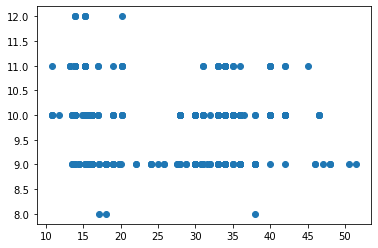

In [19]:
plt.scatter(pumpkins_data.Price, pumpkins_data.Month)

Text(0, 0.5, 'Pumpkin Price')

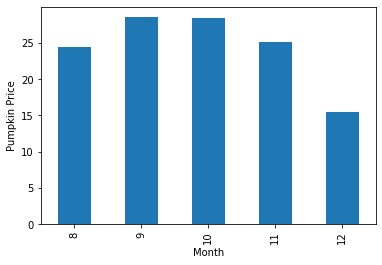

In [20]:
pumpkins_data.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

#### calculate day of year

In [21]:
day_of_year = pd.to_datetime(pumpkins_data['Date']).apply(lambda dt: (dt-datetime(dt.year, 1, 1)).days)
# pd.to_datetime(pumpkins_data['Date']).apply(lambda dt: dt.day_of_year - datetime(timestamp.year, 1, 1).timetuple().tm_yday)

In [22]:
pumpkins_data['DayOfYear'] = day_of_year

In [23]:
pumpkins_data.head()

,City Name,Package,Variety,Date,Low Price,High Price,Repack,Month,Price,DayOfYear
70,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,9/24/16,15.0,15.0,N,9,13.5,267
71,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,9/24/16,18.0,18.0,N,9,16.2,267
72,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,10/1/16,18.0,18.0,N,10,16.2,274
73,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,10/1/16,17.0,17.0,N,10,15.3,274
74,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,10/8/16,15.0,15.0,N,10,13.5,281


#### Visualize day wise price over the year

<AxesSubplot:xlabel='DayOfYear', ylabel='Price'>

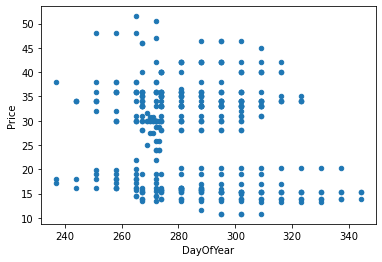

In [24]:
# plt.scatter(pumpkins_data['DayOfYear'], pumpkins_data['Price'])
pumpkins_data.plot.scatter('DayOfYear', 'Price')

<AxesSubplot:xlabel='DayOfYear'>

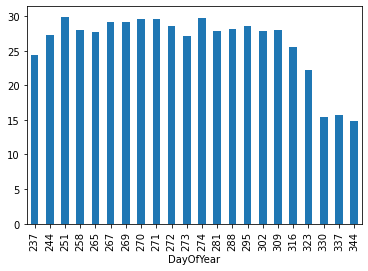

In [25]:
pumpkins_data.groupby('DayOfYear').mean()['Price'].plot(kind='bar')

#### Find correlation between price and day/month

In [26]:
print(pumpkins_data['DayOfYear'].corr(pumpkins_data['Price']))
print(pumpkins_data['Month'].corr(pumpkins_data['Price']))

-0.16690092505934476
-0.14912913634278582


### Exploring varieties of pumpkins

In [27]:
pumpkins_data['Variety'].unique()

array(['PIE TYPE', 'MINIATURE', 'FAIRYTALE', 'MIXED HEIRLOOM VARIETIES'],
      dtype=object)

#### Visualize variety wise distribution of price over the year

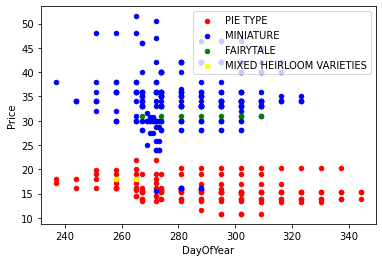

In [28]:
ax = None
colors = ['red', 'blue', 'green', 'yellow']
for i, variety in enumerate( pumpkins_data['Variety'].unique()):
    df = pumpkins_data[pumpkins_data['Variety']==variety]
    ax = df.plot.scatter('DayOfYear', 'Price', ax=ax, c=colors[i], label=variety)

#### Mean for price for each variety

<AxesSubplot:xlabel='Variety'>

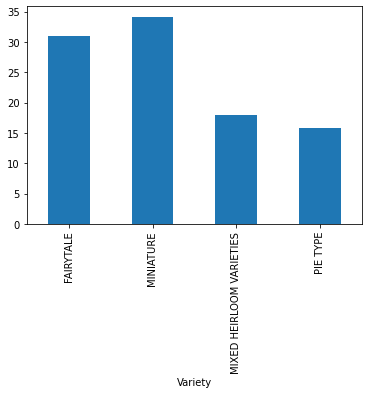

In [29]:
pumpkins_data.groupby('Variety').mean()['Price'].plot(kind='bar')

#### Visualize price distribution for each variety

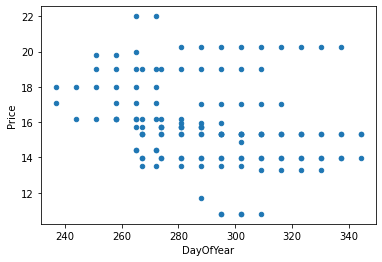

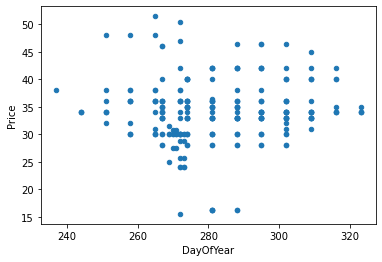

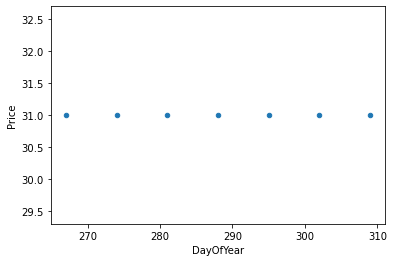

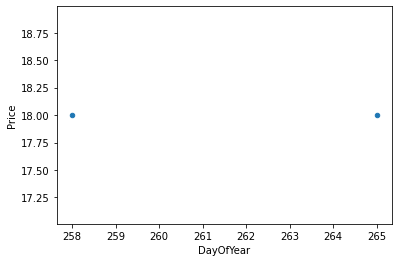

In [30]:
varieties = pumpkins_data['Variety'].unique()
for variety in varieties:
    pumpkins_data[pumpkins_data['Variety']==variety].plot.scatter('DayOfYear', 'Price')

#### Find correlation between price and each variety

In [31]:
for variety in varieties:
    pumpkins = pumpkins_data[pumpkins_data['Variety']==variety]
    correlation = pumpkins['DayOfYear'].corr(pumpkins['Price'])
    print(variety, correlation)

PIE TYPE -0.266785596914419
MINIATURE 0.06236692545398345
FAIRYTALE nan
MIXED HEIRLOOM VARIETIES nan


In [32]:
# It seems PIE TYPE has some correlation with price

#### Filter data only with PIE TYPE variety

In [33]:
pie_pumpkins = pumpkins_data[pumpkins_data['Variety']==varieties[0]]
pie_pumpkins.head()

,City Name,Package,Variety,Date,Low Price,High Price,Repack,Month,Price,DayOfYear
70,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,9/24/16,15.0,15.0,N,9,13.5,267
71,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,9/24/16,18.0,18.0,N,9,16.2,267
72,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,10/1/16,18.0,18.0,N,10,16.2,274
73,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,10/1/16,17.0,17.0,N,10,15.3,274
74,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,10/8/16,15.0,15.0,N,10,13.5,281


#### Get some info of data and clean

In [34]:
pie_pumpkins.shape

(144, 10)

In [35]:
pie_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 70 to 1630
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City Name   144 non-null    object 
 1   Package     144 non-null    object 
 2   Variety     144 non-null    object 
 3   Date        144 non-null    object 
 4   Low Price   144 non-null    float64
 5   High Price  144 non-null    float64
 6   Repack      144 non-null    object 
 7   Month       144 non-null    int64  
 8   Price       144 non-null    float64
 9   DayOfYear   144 non-null    int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 12.4+ KB


In [36]:
pie_pumpkins.isnull().sum()

City Name     0
Package       0
Variety       0
Date          0
Low Price     0
High Price    0
Repack        0
Month         0
Price         0
DayOfYear     0
dtype: int64

In [37]:
pie_pumpkins.dropna(inplace=True)

/var/folders/18/dhm8bhxd0470924gbwh_pvb00000gq/T/ipykernel_1032/3928767423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_pumpkins.dropna(inplace=True)
